In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data = pd.read_csv('../data/Detailed_Statistics_Arrivals.csv')
data.dropna(axis='rows', inplace=True)
data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2022,1282.0,N4901U,IAD,23:10,00:01,70.0,76.0,51.0,23.0,0.0,6.0,0.0,22.0
1,UA,01/01/2023,604.0,N814UA,DEN,14:58,14:52,193.0,177.0,-6.0,0.0,0.0,0.0,0.0,0.0
2,UA,01/01/2023,2488.0,N38458,EWR,23:14,23:15,75.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UA,01/01/2023,2645.0,N23721,ORD,23:57,23:47,107.0,100.0,-10.0,0.0,0.0,0.0,0.0,0.0
4,UA,01/02/2022,1282.0,N4901U,IAD,23:10,23:27,70.0,64.0,17.0,17.0,0.0,0.0,0.0,0.0


In [8]:
data['Date (MM/DD/YYYY)'] = pd.to_datetime(data['Date (MM/DD/YYYY)'])

In [9]:
data.groupby('Origin Airport')['Date (MM/DD/YYYY)'].describe(datetime_is_numeric=True)

,count,mean,min,25%,50%,75%,max
Origin Airport,,,,,,,
DEN,350,2022-08-06 23:51:46.285714176,2022-02-11,2022-05-10 06:00:00,2022-08-07 12:00:00,2022-11-02 18:00:00,2023-01-31
EWR,62,2022-10-07 02:42:34.838709760,2019-11-30,2022-11-30 06:00:00,2022-12-21 12:00:00,2023-01-15 18:00:00,2023-01-31
IAD,326,2022-04-15 05:48:57.423312896,2018-07-02,2022-01-22 06:00:00,2022-04-15 12:00:00,2022-08-05 18:00:00,2023-01-02
ORD,1352,2020-08-13 20:37:37.988165888,2017-06-08,2019-06-16 18:00:00,2020-01-31 12:00:00,2022-05-25 06:00:00,2023-01-31


In [10]:
data['Origin Airport'].unique()

array(['IAD', 'DEN', 'EWR', 'ORD'], dtype=object)

In [11]:
data['Flight Number'] = data['Flight Number'].map(lambda x: "UA " + str(int(x)))

# drop the tail number.
data.drop(columns=['Tail Number', 'Carrier Code'], axis='columns', inplace=True)
data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,2022-01-01,UA 1282,IAD,23:10,00:01,70.0,76.0,51.0,23.0,0.0,6.0,0.0,22.0
1,UA,2023-01-01,UA 604,DEN,14:58,14:52,193.0,177.0,-6.0,0.0,0.0,0.0,0.0,0.0
2,UA,2023-01-01,UA 2488,EWR,23:14,23:15,75.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UA,2023-01-01,UA 2645,ORD,23:57,23:47,107.0,100.0,-10.0,0.0,0.0,0.0,0.0,0.0
4,UA,2022-01-02,UA 1282,IAD,23:10,23:27,70.0,64.0,17.0,17.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

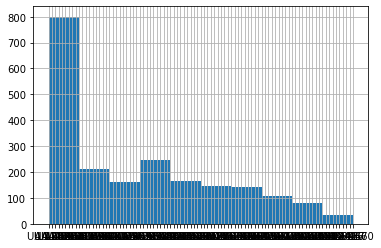

In [13]:
data['Flight Number'].hist()